In [ ]:
import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r"/data/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv").drop_duplicates()
data2=pd.read_csv(r"/data/poblacion_colombia_2018.csv",sep=";").drop_duplicates()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
1,CAUCA,POPAYÁN (CT),19001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,2
2,HUILA,PITALITO,41551000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
3,VALLE,JAMUNDÍ,76364000,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
4,AMAZONAS,LETICIA (CT),91001000,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
...,...,...,...,...,...,...,...,...,...
519383,MAGDALENA,SANTA MARTA (CT),47001000,NO REPORTADO,28/02/2022,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
519384,SANTANDER,BUCARAMANGA (CT),68001000,NO REPORTADO,30/03/2022,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
519385,SUCRE,MAJAGUAL,70429000,NO REPORTADO,12/01/2022,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
519386,SUCRE,SAN LUIS DE SINCÉ,70742000,NO REPORTADO,21/02/2022,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1


In [ ]:
data["fecha"]=pd.to_datetime(data["FECHA HECHO"])
data["año"]=data["fecha"].dt.year
data["mes"]=data["fecha"].dt.month

In [ ]:
data2

In [ ]:
data2["DEPARTAMENTO"]=data2['departamento'].apply(lambda x:x.upper().replace("VALLE DEL CAUCA","VALLE").replace("ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA","SAN ANDRÉS").replace(
    "LA GUAJIRA","GUAJIRA"))
data2["población"]=data2["población"].apply(lambda x:int(x.replace(".","")))

In [ ]:
data3=data.merge(data2, on="DEPARTAMENTO",how="left")

In [ ]:
prop=data3.groupby(["DEPARTAMENTO","año","mes"]).agg({'CANTIDAD':'sum','población':'mean'})

In [ ]:
dep=["HUILA","PUTUMAYO","CASANARE","SANTANDER","BOYACA"]
prop["hurto_per1000hab"]=prop['CANTIDAD']*1000/prop["población"]
prop.groupby("DEPARTAMENTO").sum().sort_values("hurto_per1000hab")[-5:]
prop=prop.reset_index()


In [ ]:
prop=prop[(prop["DEPARTAMENTO"].isin(dep))]

In [ ]:
prop['date'] = prop['mes'].map(str)+ '-' +prop['año'].map(str)
prop['date'] = pd.to_datetime(prop['date'], format='%m-%Y').dt.strftime('%m-%Y')
prop=prop[prop['año']>=2018]
prop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTAMENTO,año,mes,CANTIDAD,población,hurto_per1000hab,date
1343,CASANARE,2018,1,109,168433.0,0.647142,01-2018
1344,CASANARE,2018,2,83,168433.0,0.492778,02-2018
1345,CASANARE,2018,3,95,168433.0,0.564022,03-2018
1346,CASANARE,2018,4,94,168433.0,0.558085,04-2018
1347,CASANARE,2018,5,108,168433.0,0.641205,05-2018
...,...,...,...,...,...,...,...
4178,SANTANDER,2022,8,24,581130.0,0.041299,08-2022
4179,SANTANDER,2022,9,30,581130.0,0.051624,09-2022
4180,SANTANDER,2022,10,22,581130.0,0.037857,10-2022
4181,SANTANDER,2022,11,27,581130.0,0.046461,11-2022


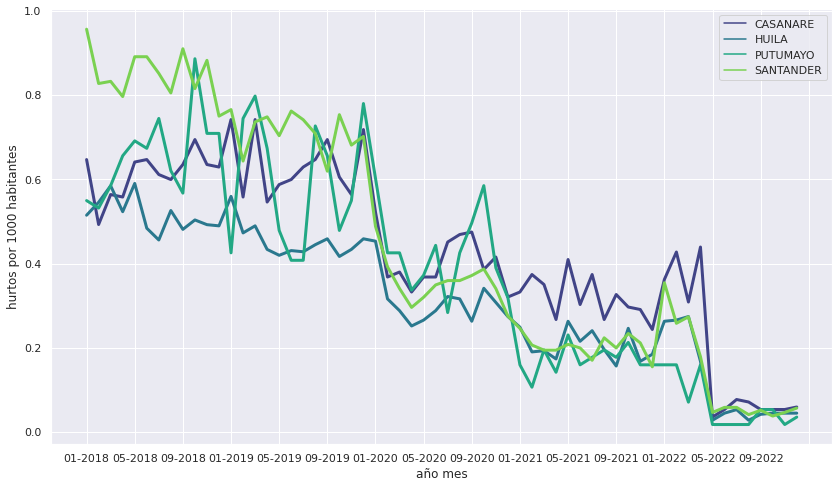

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=prop, x ='date', y = 'hurto_per1000hab',
                  hue='DEPARTAMENTO', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('hurtos por 1000 habitantes')
plt.xlabel('año mes')
plt.show()